In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from pandas import read_csv, Series
import numpy as np

In [204]:
def clean_and_read_adult(data_file="train"):
    try:
        f = open('adult_%s.csv' % data_file)
    except IOError:
        f = open('adult.%s' % data_file)
    lines = f.read().split('\n')
    w = open('adult_%s_clean.csv' % data_file, 'wb')
    w.write(lines[0]+'\n')
    for l in lines[1:]:
        w.write(','.join([_.strip() for _ in l.split(',')])+'\n')
    w.close()
    f.close()
    data = read_csv('adult_%s_clean.csv' % data_file)
    _class = data['salary'] == '>50K'
    data['class'] = Series(_class)
    total = float(len(data))
    return data, total

In [2]:
## to clean the dataset
f = open('adult_train.csv')
lines = f.read().split('\n')

w = open('adult_train_clean.csv', 'wb')
w.write(lines[0]+'\n')
for l in lines[1:]:
    w.write(','.join([_.strip() for _ in l.split(',')])+'\n')
w.close()
f.close()

In [3]:
data = read_csv('adult_train_clean.csv')
_class = data['salary'] == '>50K'
data['class'] = Series(_class)
total = float(len(data))

In [4]:
data.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'salary', u'class'],
      dtype='object')

In [5]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,False
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,False
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,False
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,True
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,True


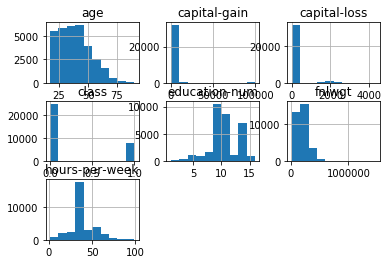

In [6]:
data.hist()
plt.show()

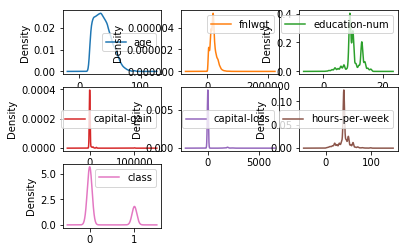

In [7]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [8]:
# count of people less or greater than 45 years of age
np.bincount(data['age']>30)

array([10572, 21989])

In [9]:
# race analysis

query_race = 'Other'
not_race, race = np.bincount(data['race'] == query_race)
print not_race, race
print race/float(total)
assert not_race + race == len(data), "Error"
race_less, race_more = np.bincount(data[data['race'] == query_race]['class'])
assert race_less + race_more == race
print race_more, race_less
print race_more / float(race)

32290 271
0.00832284020761
25 246
0.0922509225092


In [10]:
# occupation analysis with race

query_occupation = 'Exec-managerial'
query_race = 'Black'

condition_race = data['race'] == query_race
condition_occupation = data['occupation'] == query_occupation
condition_more = data['class']

not_race, race = np.bincount(condition_race)
print "{} people belong to {}, {} people not {}".format(race, query_race, not_race, query_race)
print "Percent: ",race/float(total)

not_occupation, occupation = np.bincount(condition_occupation)
print "{0} people work as {2}, {1} people not {2}".format(occupation, not_occupation, total)
print "Percent: ",occupation/float(total)

occupation_race = data[condition_race & condition_occupation]

common_less, common_more = np.bincount(occupation_race['class'])
print common_less, common_more

3124 people belong to Black, 29437 people not Black
Percent:  0.0959429992936
4066 people work as 32561.0, 28495 people not 32561.0
Percent:  0.124873314702
160 84


In [11]:
a = data['race'] == 'Black'
b = data['occupation'] == 'Exec-managerial'

len(data[a & b])

244

In [12]:
# occupation analysis with race

query_occupation = 'Exec-managerial'
query_race = 'White'

condition_race = data['race'] == query_race
condition_occupation = data['occupation'] == query_occupation
condition_more = data['class']

np.bincount(data[condition_occupation & condition_race]['class'])

array([1828, 1818])

In [13]:
# gender analysis

query_gender = 'Female'
np.bincount(data[data['sex'] == query_gender]['occupation'] == 'Exec-managerial')

array([9612, 1159])

In [14]:
np.bincount(data[data['occupation'] == 'Exec-managerial']['sex'] == 'Male')

array([1159, 2907])

In [15]:
np.bincount(data['occupation'] == 'Exec-managerial')

array([28495,  4066])

In [16]:
import scipy

In [17]:
X = data.values
pop_skew = []
for i in range(X.shape[1]):
    try:
        pop_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue

/Users/sivaramanks/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [18]:
X = data[data['race'] == 'White'].values
white_skew = []
for i in range(X.shape[1]):
    try:
        white_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue

In [19]:
X = data[data['race'] == 'Black'].values
black_skew = []
for i in range(X.shape[1]):
    try:
        black_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue

In [20]:
condition1 = data['race'] == 'Black'
condition2 = data['occupation'] == 'Exec-managerial'

X = data[condition1 & condition2].values
black_mgr_skew = []
for i in range(X.shape[1]):
    try:
        black_mgr_skew.append(scipy.stats.skew(X[:,i]))
    except TypeError:
        continue
        
condition1 = data['race'] == 'White'
condition2 = data['occupation'] == 'Exec-managerial'

X = data[condition1 & condition2].values
columns = data.columns
numeric_labels = []
white_mgr_skew = []
for i in range(X.shape[1]):
    try:
        white_mgr_skew.append(scipy.stats.skew(X[:,i]))
        numeric_labels.append(columns[i])
    except TypeError:
        continue

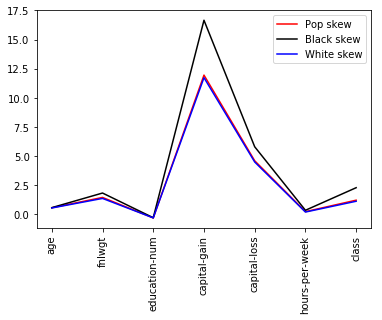

In [21]:
plt.plot(pop_skew, 'r', label="Pop skew")
plt.plot(black_skew, 'k', label="Black skew")
plt.plot(white_skew, 'b', label="White skew")
#plt.plot(white_mgr_skew, 'c.', label="White Mgr skew")
#plt.plot(black_mgr_skew, 'g.', label="Black Mgr skew")
plt.legend()
plt.xticks(range(len(numeric_labels)), numeric_labels, rotation='vertical')
plt.show()

In [22]:
condition1 = data['age'] > 38
condition2 = data['sex'] == 'Female'

output = condition1 & condition2

scipy.stats.skew(data['class'])

1.2123743878187736

In [23]:
scipy.stats.skew(data[output]['class'])

1.8626017979997584

In [24]:
from sklearn.ensemble import RandomForestClassifier as RF

In [25]:
X = data.loc[:, data.columns != 'salary']

X = X.loc[:, X.columns != 'class']

Y = data['class']

In [26]:
model = RF(n_estimators=100, n_jobs=-1)

In [32]:
print 'all', np.bincount(data['class'])
for race in data['race'].unique():
    query_race = data['race'] == race
    class_race = data[query_race]['class']
    print race, np.bincount(class_race)

all [24720  7841]
White [20699  7117]
Black [2737  387]
Asian-Pac-Islander [763 276]
Amer-Indian-Eskimo [275  36]
Other [246  25]


In [35]:
def get_distribution(distr_sample):
    type_a, type_b = np.bincount(distr_sample)
    total = float(len(distr_sample))
    return type_a/total, type_b/total

In [36]:
class_no_prior, class_yes_prior = get_distribution(data['class'])

In [38]:
original_black_no_prior, original_black_yes_prior = get_distribution(data[data['race'] == 'Black']['class'])

In [55]:
#random_index = np.data['race'] == 'Black'
## will not work if there are not enough samples to match either prior
#black_yes_index = np.random.choice(data.index[(data['race'] == 'Black') & (data['class'] == True)], int(class_yes_prior*total), replace=False)
#black_no_index = np.random.choice(data.index[(data['race'] == 'Black') & (data['class'] == False)], int(class_no_prior*total), replace=False)

In [49]:
black_no_index.shape

(24720,)

In [50]:
class_no_prior, class_yes_prior

(0.75919044255397561, 0.24080955744602439)

In [51]:
original_black_no_prior, original_black_yes_prior

(0.8761203585147247, 0.12387964148527529)

In [56]:
len(black_no_index)/total

0.7591904425539756

In [88]:
class_no_prior

0.75919044255397561

In [98]:
print np.bincount(data['class'])
print get_distribution(data['class'])

[24720  7841]
(0.75919044255397561, 0.24080955744602439)


In [99]:
values = data[data['race'] == 'Black']['class']
print np.bincount(values)
print get_distribution(values)

[2737  387]
(0.8761203585147247, 0.12387964148527529)


In [102]:
a,b = get_distribution(data['class'])
print np.divide(a,b)
print np.divide(b,a)

3.1526590996
0.317192556634


In [103]:
c,d = get_distribution(values)
print np.divide(c,d)
print np.divide(d,c)

7.07235142119
0.14139568871


In [115]:
all_no, all_yes = np.bincount(data['class'])
black_no, black_yes = np.bincount(data[data['race'] == 'Black']['class'])

In [116]:
all_prior_no, all_prior_yes = get_distribution(data['class'])
black_prior_no, black_yes_prior = get_distribution(values)

In [117]:
all_prior_no

0.75919044255397561

In [118]:
all_prior_yes

0.24080955744602439

In [119]:
black_prior_no

0.8761203585147247

In [120]:
yes_over_no = all_yes/float(all_no)

In [121]:
yes_over_no

0.31719255663430423

In [124]:
no_over_yes = 1/yes_over_no

In [125]:
no_over_yes

3.1526590996046422

In [150]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [142]:
X = data.fillna(0).loc[:, data.columns != 'salary']
# set missing values to 0
#X[X == '?'] = 0
X = X.loc[:, X.columns != 'class'].values
Y = data['class'].values

In [143]:
X.shape, Y.shape

((32561, 14), (32561,))

In [151]:
# encode string input values as integers
encoded_x = None
numeric_x = None
for i in range(0, X.shape[1]):
    if type(X[0,i]) != str:
        if numeric_x is None:
            numeric_x = X[:,i].reshape(X.shape[0], 1)
            print numeric_x.shape

        else:
            numeric_x = np.concatenate((X[:,i].reshape(X.shape[0], 1), numeric_x), axis=1)
        continue
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False)
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = np.concatenate((encoded_x, feature), axis=1)
print("ecoded X shape: : ", encoded_x.shape)
print("numericX shape: : ", numeric_x.shape)
X_ = np.concatenate((numeric_x, encoded_x), axis=1)
print X_.shape

(32561, 1)
('ecoded X shape: : ', (32561, 102))
('numericX shape: : ', (32561, 6))
(32561, 108)


In [152]:
model_rf = RF(n_estimators=100)

In [158]:
model_rf.fit(X_,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [159]:
pred_rf = model_rf.predict(X_)

In [190]:
np.bincount(pred_rf == Y)

array([    3, 32558])

In [162]:
## after deskewing it

In [63]:
##races_prior = {'all': {'no': class_no_prior, 'yes':class_yes_prior}}
races_prior = {}
for race in data['race'].unique():
    no, yes = get_distribution(data[data['race'] == race]['class'])
    races_prior[race] = {'no_prior':no, 'yes_prior':yes}

In [64]:
## Correlates directly with skew values
races_prior

{'Amer-Indian-Eskimo': {'no_prior': 0.88424437299035374,
  'yes_prior': 0.1157556270096463},
 'Asian-Pac-Islander': {'no_prior': 0.73435996150144367,
  'yes_prior': 0.26564003849855633},
 'Black': {'no_prior': 0.8761203585147247, 'yes_prior': 0.12387964148527529},
 'Other': {'no_prior': 0.90774907749077494, 'yes_prior': 0.092250922509225092},
 'White': {'no_prior': 0.74414006327293647, 'yes_prior': 0.25585993672706359}}

In [178]:
new_X = None
_sum = 0
for race in races_prior:
    print race,
    if races_prior[race]['no_prior'] >= class_no_prior:
        race_yes_index = data.index[(data['race'] == race) & (data['class'] == True)].tolist()
        race_no_index = data.index[(data['race'] == race) & (data['class'] == False)]
        race_no_index = np.random.choice(race_no_index,
                                         int(no_over_yes*len(race_yes_index)), replace=False).tolist()
    else:
        race_no_index = data.index[(data['race'] == race) & (data['class'] == False)].tolist()
        race_yes_index = data.index[(data['race'] == race) & (data['class'] == True)]
        race_yes_index = np.random.choice(race_yes_index,
                                          int(yes_over_no*len(race_no_index)), replace=False).tolist()
    print len(race_no_index)/ float(len(race_yes_index)+len(race_no_index))
    _sum += len(race_no_index + race_yes_index)
    ##print data.loc[race_no_index+race_yes_index,['race', 'class']]
    ##raw_input()
    if new_X is None:
        new_X = X_[race_no_index + race_yes_index]
        new_Y = Y[race_no_index + race_yes_index]
    else:
        new_X = np.concatenate((new_X, X_[race_no_index + race_yes_index]), axis=0)
        new_Y = np.concatenate((new_Y, Y[race_no_index + race_yes_index]), axis=0)
print total
print _sum

Asian-Pac-Islander 0.7592039801
Amer-Indian-Eskimo 0.758389261745
White 0.759206279343
Other 0.757281553398
Black 0.759178593653
32561.0
30128


In [179]:
new_X.shape

(30128, 108)

In [197]:
model_deskew = RF(n_estimators=100, n_jobs=-1)
model_deskew.fit(new_X, new_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [198]:
pred_rf_deskew = model_deskew.predict(X_)

In [199]:
np.bincount(pred_rf_deskew == Y)

array([  331, 32230])

In [208]:
data_test, test_total = clean_and_read_adult('test') 

In [209]:
data_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,False
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,False
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.,False
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.,False
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.,False
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.,False
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.,False
